In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv(r"C:\Users\amani\OneDrive\Desktop\Projects\Customer_segmentation\Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data = customer_data.rename(columns={"Annual Income (k$)":"Income" , "Spending Score (1-100)":"Spending_Score"})
customer_data.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [4]:
# removing irrelevant feature

customer_data = customer_data.drop(columns = "CustomerID")

In [5]:
# checking duplicate values

customer_data.duplicated(keep = False).sum()

0

In [6]:
# checking null values

customer_data.isnull().sum()

Gender            0
Age               0
Income            0
Spending_Score    0
dtype: int64

# Bivariate analysis

<AxesSubplot:xlabel='Gender', ylabel='Income'>

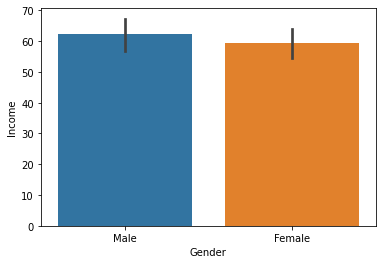

In [7]:
sns.barplot(y = customer_data.Income , x = customer_data.Gender)

<AxesSubplot:xlabel='Gender', ylabel='Spending_Score'>

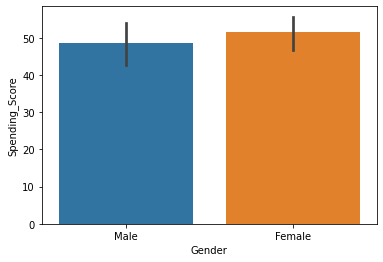

In [8]:
sns.barplot(y = customer_data.Spending_Score , x = customer_data.Gender)

In [9]:
#By above two bar charts we can conclude that despite having less income female spend more as compared to men

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

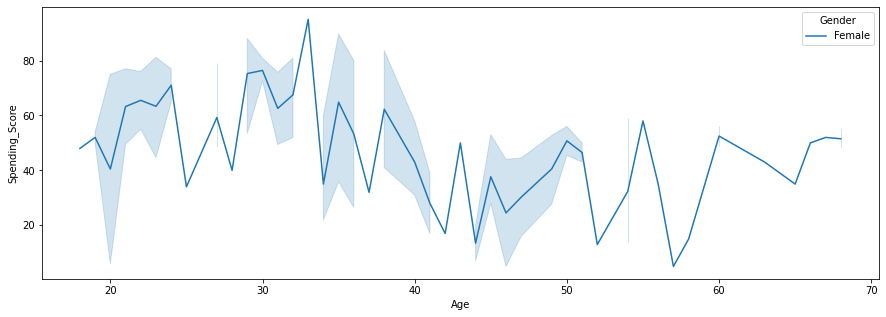

In [10]:
fig,ax = plt.subplots(figsize = (15,5))
sns.lineplot(x = customer_data["Age"] , y = customer_data["Spending_Score"] ,
             hue = customer_data.Gender[customer_data["Gender"] == 'Female'] ,ax = ax)

In [11]:
#By above chart we can conclude that women in age group between 30-40 spends more.

# Mutli-variate analysis

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Income          200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

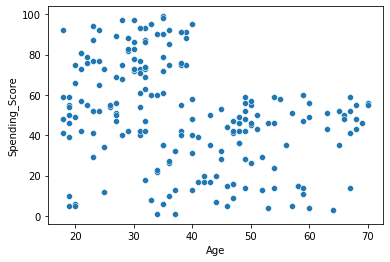

In [13]:
sns.scatterplot(x = customer_data['Age'] , y = customer_data["Spending_Score"])

<AxesSubplot:xlabel='Income', ylabel='Spending_Score'>

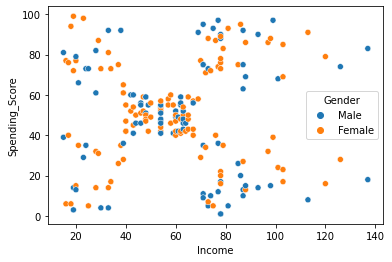

In [14]:
sns.scatterplot(x = customer_data['Income'] , y = customer_data["Spending_Score"] , hue = customer_data["Gender"])

# 5 clusters are clearly visible

# Clustering process started.........

In [15]:
# we have to find optimal number of cluster(K) using elbow method

# elbow method is a graph between number of clusters(K)-x axis and inertia(y-axis)

# inertia->calculated by measuring the distance between each data point and its centroid, squaring this distance, 
#           and summing these squares across one cluster. 

# A good model is one with low inertia AND a low number of clusters

In [16]:
customer_data.columns

Index(['Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

### First lets do with 'age' and "Spending_Score"


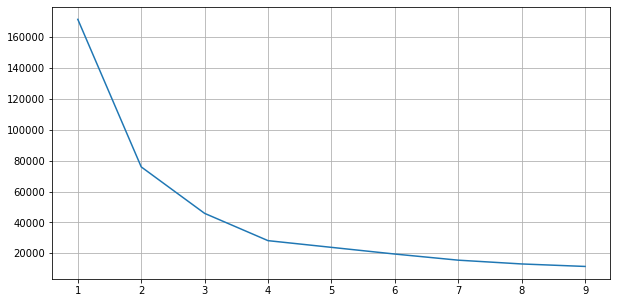

In [17]:
x1 = customer_data.loc[: , ["Age" , "Spending_Score"]]

from sklearn.cluster import KMeans

inertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)
  
# plotting    
fig,ax = plt.subplots(figsize = (10,5))    
sns.lineplot(x = range(1,10) , y = inertia , ax = ax)
plt.grid()

# we can consider that our optimum cluster will be 4 

In [24]:
#now using k = 4

kmeans = KMeans(n_clusters = 4 , init = 'k-means++')
datapoints_cluster = kmeans.fit_predict(x1)
datapoints_cluster

array([2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [36]:
centres = kmeans.cluster_centers_    # x and y coordinates of each cluster(0 to 3)
centres

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333]])

Text(0.5, 1.0, 'clusters of customers')

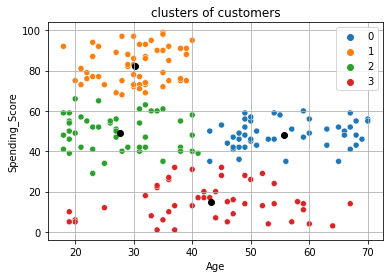

In [51]:
# visualization of all clusters in one graph

sns.scatterplot(x = x1.Age , y = x1.Spending_Score , hue = datapoints_cluster , palette = "tab10")  
plt.scatter(centres[:,0] , centres[:,1] , color = "black")   # centres with black dot
plt.grid()
plt.title("clusters of customers")

# Similarly we can do for different scenerios like income + spending score or income + spending score + age 

But if we take last scenrio "income + spending score + age" in this we can't use simple scattter plot 
as we have 3 variable here so here we have to use 3d image.